# Antenna Array Example
The codes build a linear antenna array based on the input parameters and calculate/visulize the array radiation pattern. It can calculaet some array pattern performance parameters such as Gain, Side Lobe Level (SLL) and Half Power Beam Widrg (HPBW). 

## Array Geometry 


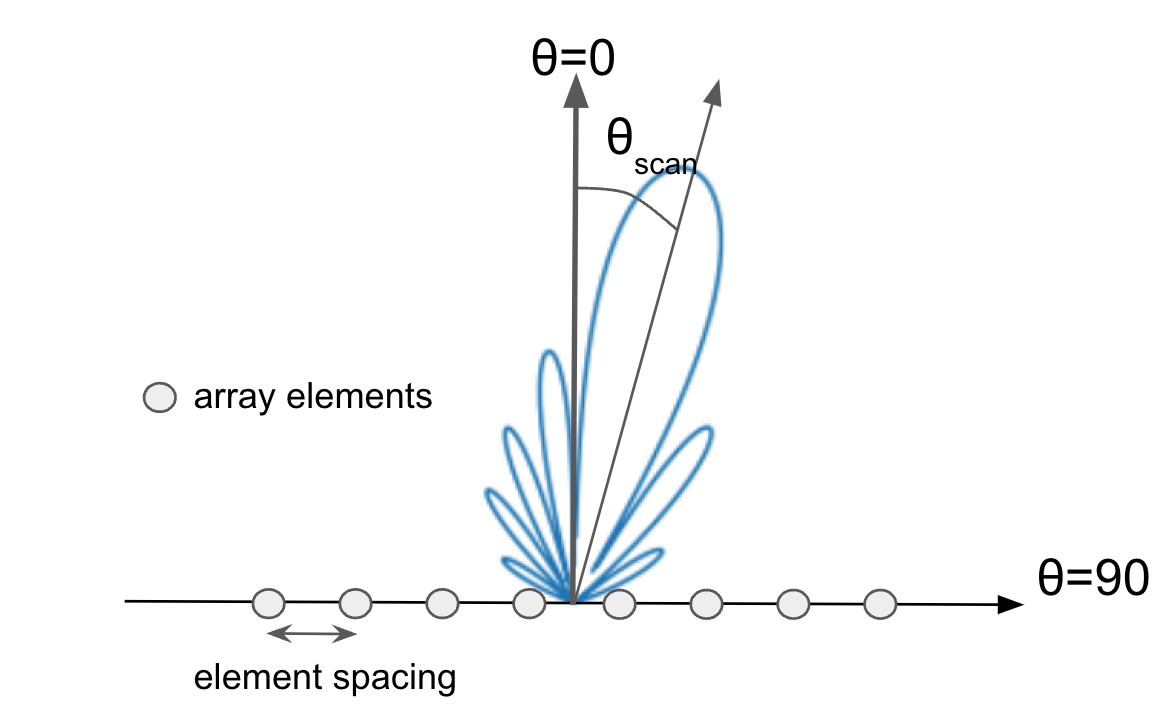

In [1]:
from IPython.display import Image
Image("img/array_geo.png",width = 600, height = 300)

Peak = 8.5dBi, theta_peak = 20.0deg, SLL = 12.3dB, HPBW = 13.0deg


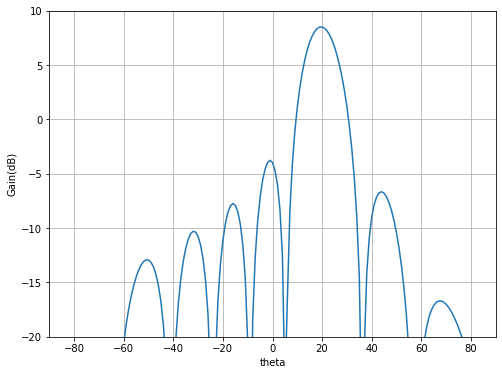

In [2]:
# calculate the pattern and parameters for a uniform linear array of 8 elements with scan angle = 20
# using linear array class
from linear_array import LinearArray

N = 8 # number of array elements
element_spacing = 0.5 # in wavelength
la = LinearArray(N,element_spacing,scan_angle=20,element_pattern=True)
la.calc_AF
la.plot_pattern(xlab='theta',ylab='Gain(dB)')
params = la.calc_peak_sll_hpbw_calc()
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.format(*params))


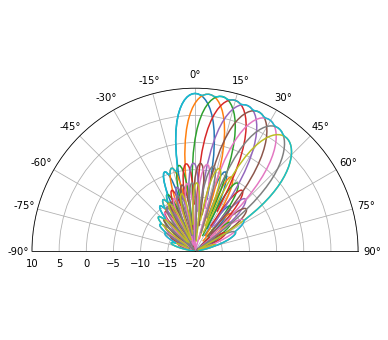

In [3]:
la.calc_envelope(theta1=0,theta2=45,delta_theta=5)
la.polar_envelope();


Peak = 10.8dBi, theta_peak = 30.0deg, SLL = 12.4dB, HPBW = 7.0deg


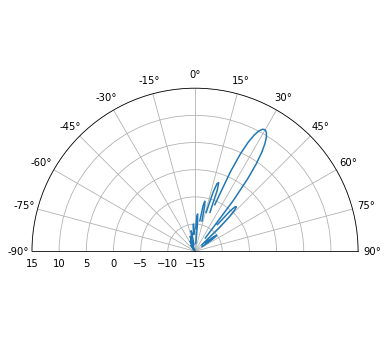

In [4]:
# calculate the pattern and parameters for a uniform linear array of 8 elements with scan angle = 20
# using antenna_array module


from antenna_array import calc_AF, calc_AF_, plot_pattern, polar_pattern ,calc_peak_sll_hpbw, db20
import numpy as np
import matplotlib.pyplot as plt
import random



N = 16 # number of elements
element_spacing = 0.5 
scan_angle = 30
theta_deg,AF_linear = calc_AF(N,element_spacing,scan_angle)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'
      .format(peak, theta_peak, SLL, HPBW))
polar_pattern(theta_deg,G);


Peak = 9.9dBi, theta_peak = 30.0deg, SLL = 5.8dB, HPBW = 6.0deg


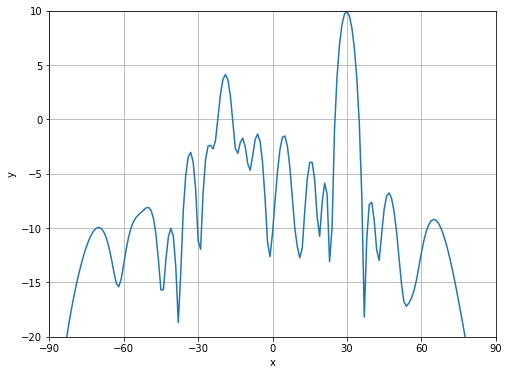

In [5]:
# An array of N element with random element spacing choosen from element spacing list
element_spacing = [0.25,0.5,0.75,1 ]
X = np.cumsum(random.choices(element_spacing,k=N))
# X = np.linspace(0,N,N-1) * element_spacing
P = -2 * np.pi * X * np.sin(np.radians(scan_angle))
I = np.ones(X.shape)
Nt = 181 # length of theta vectoe
theta_deg,dtheta_deg = np.linspace(-90,90,Nt,retstep = True)
theta_deg = theta_deg.reshape(Nt,1)
AF_linear = calc_AF_(X,I,P,theta_deg)
G = db20(AF_linear)
peak, theta_peak, SLL, HPBW = calc_peak_sll_hpbw(G, theta_deg) 
print('Peak = {:1.1f}dBi, theta_peak = {:1.1f}deg, SLL = {:1.1f}dB, HPBW = {:1.1f}deg'.
      format(peak, theta_peak, SLL, HPBW))
fig, ax = plot_pattern(theta_deg,G);
ax.set_xticks(np.linspace(-90,90,7));